In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Q1-Read the data https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/diamond.csv')

The description of dataset is given below.

•	ID: Uniquely identifies each observation (diamond)

•	Carat Weight: The weight of the diamond in metric carats. One carat is equal to 0.2 grams, roughly the same weight as a paperclip

•	Cut: One of five values indicating the cut of the diamond in the following order of desirability (Signature-Ideal, Ideal, Very Good, Good, Fair)

•	Color: One of six values indicating the diamond's color in the following order of desirability (D, E, F - Colorless, G, H, I - Near colorless)

•	Clarity: One of seven values indicating the diamond's clarity in the following order of desirability (F - Flawless, IF - Internally Flawless, VVS1 or VVS2 - Very, Very Slightly Included, or VS1 or VS2 - Very Slightly Included, SI1 - Slightly Included)

•	Polish: One of four values indicating the diamond's polish (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Symmetry: One of four values indicating the diamond's symmetry (ID - Ideal, EX - Excellent, VG - Very Good, G - Good)

•	Report: One of of two values "AGSL" or "GIA" indicating which grading agency reported the qualities of the diamond qualities

•	Price: The The amount in USD that the diamond is valued


In [3]:
#Q2-Get first 2 rows of data
df.head(2)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470


In [4]:
#Q3-Check if there is missing value
df.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [5]:
#Q4- Get data information and number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [18]:
#Q5-Get descriptive statistics of data
df.describe()

,Carat Weight,Price
count,6000.000000,6000.000000
mean,1.334520,11791.579333
std,0.475696,10184.350051
min,0.750000,2184.000000
25%,1.000000,5150.500000
50%,1.130000,7857.000000
75%,1.590000,15036.500000
max,2.910000,101561.000000


<AxesSubplot:>

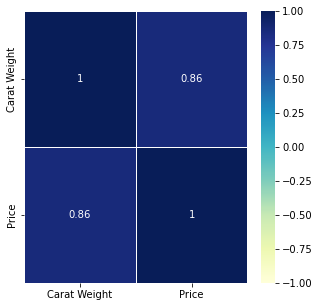

In [7]:
#Q6-Use seasoborns heat map to generate following heatmap
# annot = True to print the correlation inside the square
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True, linewidths=.8, cmap='YlGnBu')

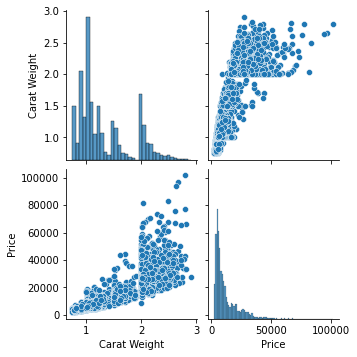

In [8]:
#Q7-Use seasoborns paiplot to generate following  diagram
sns.pairplot(df)

In [9]:
#Q8-Divide the data so that get Price as ouput variable (Y) and other variables as input varable (X)
x = df.drop('Price',1)
y = df['Price']

x.shape, y.shape

C:\Users\abdul\AppData\Local\Temp\ipykernel_4280\2906789588.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop('Price',1)


((6000, 7), (6000,))

In [10]:
#Q9-Create dummy for the input variables 
x = pd.get_dummies(x)
x.shape

(6000, 29)

In [11]:
#Q10 -Split the input and output data into two parts: test data (20%) and train data(%80)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [12]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred 
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)

In [13]:
#Q11 Use Linear regression to evaluate the performance of test and train data of Linear model  using evalmetric
lr_model=LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
evalmetric(y_test,lr_pred)

MSE: 16859840.765833333
RMSE: 4106.073643498535
MAE: 2598.2625
MAPE: 31.793590677930133
R-Squared: 0.840310244124822


Q12 -Based on the performance of test and training model, can we say there is overfitting or not in the performace of liner model?
Answer: Yes, based on metrics we can say that modal cannot generalize well on new data.

In [14]:
#Q13- Use Lasso regression to evaluate the performance of test and train data   using evalmetric
lasso_model=Lasso(alpha=1)
lasso_model.fit(x_train,y_train)
lasso_pred = lasso_model.predict(x_test)
evalmetric(y_test,lasso_pred)

MSE: 15674675.384726183
RMSE: 3959.1255833487
MAE: 2414.148974581977
MAPE: 28.804623992157318
R-Squared: 0.8515356627399402


In [15]:
#Q14 Use Ridge regreesionto evaluate the performance of test and train data   using evalmetric
ridge_model=Ridge(alpha=1)
ridge_model.fit(x_train,y_train)
ridge_pred = ridge_model.predict(x_test)
evalmetric(y_test,ridge_pred)

MSE: 15667801.154128034
RMSE: 3958.25733803754
MAE: 2417.8107154511217
MAPE: 28.88732244323437
R-Squared: 0.8516007727383852


Q15- Did you get any improvement on test data using Ridge and Lasso?
Explain why? 
Answer: Yes, because lasso and ridge methods peneralize more to make more generalization to predict more accurate on new data. 

In [16]:
#Q16-Use Decison Tree Regression to evaluate the performance of test and train data   using evalmetric
tree_model=DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
tree_pred = tree_model.predict(x_test)
evalmetric(y_test,tree_pred)

MSE: 4364320.494341025
RMSE: 2089.095616371119
MAE: 959.1534166666663
MAPE: 7.296588775036186
R-Squared: 0.9586628792061485


In [17]:
#Q17-Use Random Forest to evaluate the performance of test and train data   using evalmetric
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
evalmetric(y_test,rf_pred)

MSE: 2106701.606219674
RMSE: 1451.4481066230628
MAE: 701.1846162128377
MAPE: 5.4393155242218105
R-Squared: 0.9800461540609078


Q18-Why Random forest perform better than Decison Tree on test data?
Answer: Because random forest is ensemble model of Decison Tree. Collect all Decision Tree models and ensemble them into 1 model.

Q19- Which regression technique among Linear Regresssion, Lasso Regression ,Ridge Regression, Decision Tree and Random Forest  provide best performance on test data?
Answer: Based on metrics, Random Forest model is more best performer model.